In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
# Removing the serial number column as the data is already indexed by pandas
df = pd.read_csv('final_data.csv')
df.drop(df.columns[[0]], axis=1, inplace=True) 
df.head() #data

,Property_ID,Property_Name,Property_Type,Property_Purpose,Baths,Bedrooms,City,Property_Location,Area,Area_Name,Property_Price,Date_Added
0,Flat 35683655,On Bed Apartment Possession In 1 Year For Sale...,Flat,For Sale,1,1,Lahore,"Bahria Town, Lahore, Punjab",2.1,Bahria Town,3900000,24/12/2022
1,Flat 43095148,Luxury Studio Apartment For Sale On Easy Insta...,Flat,For Sale,1,-,Lahore,"Raiwind Road, Lahore, Punjab",2.2,Raiwind Road,6000000,24/12/2022
2,Flat 43158444,Flat Sized 10 Marla Is Available For sale In A...,Flat,For Sale,3,3,Lahore,"Askari, Lahore, Punjab",10.0,Askari,30000000,28/12/2022
3,Flat 43158439,10 Marla Flat For sale Is Available In Askari ...,Flat,For Sale,3,3,Lahore,"Askari, Lahore, Punjab",10.0,Askari,30000000,28/12/2022
4,Flat 43158422,Ideally Located Flat For sale In Askari 11 - S...,Flat,For Sale,3,3,Lahore,"Askari, Lahore, Punjab",10.0,Askari,30000000,28/12/2022


In [3]:
len(df)

12725

In [4]:
#Changing data types
#replace NA or inf with int max value
df = df.replace([np.inf, -np.inf], np.iinfo(np.int64).max)
df['Property_ID'] = df['Property_ID'].astype(str)
df['Property_Name'] = df['Property_Name'].astype(str)
df['Property_Type'] = df['Property_Type'].astype(str)
df['Property_Purpose'] = df['Property_Purpose'].astype(str)
df['Baths'] = df['Baths'].replace('-', 0)
df['Bedrooms'] = df['Bedrooms'].replace('-', 0)
df['Baths'] = df['Baths'].astype(int)
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['City'] = df['City'].astype(str)
df['Property_Location'] = df['Property_Location'].astype(str)
df['Area'] = df['Area'].astype(float)
df['Area_Name'] = df['Area_Name'].astype(str)
df['Property_Price'] = df['Property_Price'].astype(int)
df['Date_Added'] = df['Date_Added'].astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12725 entries, 0 to 12724
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property_ID        12725 non-null  object 
 1   Property_Name      12725 non-null  object 
 2   Property_Type      12725 non-null  object 
 3   Property_Purpose   12725 non-null  object 
 4   Baths              12725 non-null  int64  
 5   Bedrooms           12725 non-null  int64  
 6   City               12725 non-null  object 
 7   Property_Location  12725 non-null  object 
 8   Area               12725 non-null  float64
 9   Area_Name          12725 non-null  object 
 10  Property_Price     12725 non-null  int64  
 11  Date_Added         12725 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Baths,Bedrooms,Area,Property_Price
count,12725.000000,12725.000000,12725.000000,1.272500e+04
mean,3.618861,3.371788,11.045220,2.458487e+07
std,2.072626,1.987624,10.806802,5.612490e+07
min,0.000000,0.000000,0.200000,1.000000e+00
25%,2.000000,2.000000,4.700000,9.900000e+04
50%,4.000000,3.000000,8.033059,1.000000e+06
75%,5.000000,5.000000,13.950415,3.000000e+07
max,10.000000,16.000000,300.000000,9.000000e+08


In [7]:
# print missing values

features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [8]:
#check if there is any null value in the data 
df.isnull().sum()

Property_ID          0
Property_Name        0
Property_Type        0
Property_Purpose     0
Baths                0
Bedrooms             0
City                 0
Property_Location    0
Area                 0
Area_Name            0
Property_Price       0
Date_Added           0
dtype: int64

/tmp/ipykernel_30997/721799089.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot = True)


Text(0.5, 1.0, 'CORRELATION MATRIX')

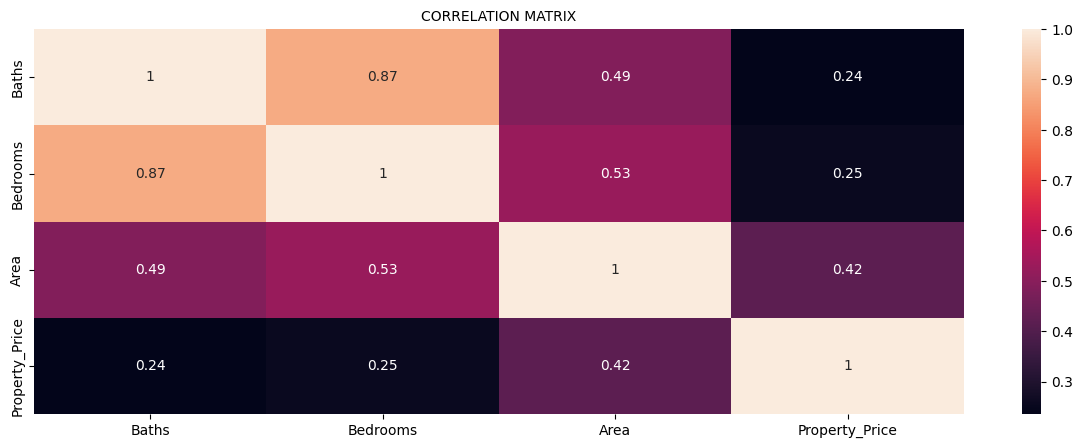

In [9]:
# Checking correlation between the features
plt.figure(figsize=(15,5))
ax = sns.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=10)

In [10]:
# remove columns that contribute nothing
# Property ID, Property Name are strings they contribute nothing to model
# Property Location is redundant 
# The data is recent, so the Date Added is same year for all the records
df = df.drop(['Property_ID','Property_Name','Property_Location','Date_Added'], axis=1)

In [11]:
df.head()  

,Property_Type,Property_Purpose,Baths,Bedrooms,City,Area,Area_Name,Property_Price
0,Flat,For Sale,1,1,Lahore,2.1,Bahria Town,3900000
1,Flat,For Sale,1,0,Lahore,2.2,Raiwind Road,6000000
2,Flat,For Sale,3,3,Lahore,10.0,Askari,30000000
3,Flat,For Sale,3,3,Lahore,10.0,Askari,30000000
4,Flat,For Sale,3,3,Lahore,10.0,Askari,30000000


In [12]:
df['Property_Type'].unique()

array(['Flat', 'House'], dtype=object)

In [13]:
df['City'].unique()

array(['Lahore', 'Islamabad', 'Karachi'], dtype=object)

In [14]:
df['Property_Purpose'].unique()

array(['For Sale', 'For Rent'], dtype=object)

In [15]:
# Properties with 0 bedrooms and 0 baths
c = df.Bedrooms[df.Bedrooms==0].count()
print("Number of Properties with 0 bedrooms: ", c)
print('Percentage of bedrooms with value 0: ', 100*np.round(c/df.shape[0],4))

c = df.Baths[df.Baths == 0].count()
print("\nNumber of Properties with 0 baths: ", c)
print('Percentage of baths with value 0: ', 100*np.round(c/df.shape[0],4))

Number of Properties with 0 bedrooms:  999
Percentage of bedrooms with value 0:  7.85

Number of Properties with 0 baths:  942
Percentage of baths with value 0:  7.3999999999999995


Text(0.5, 1.0, 'Bedrooms VS Price')

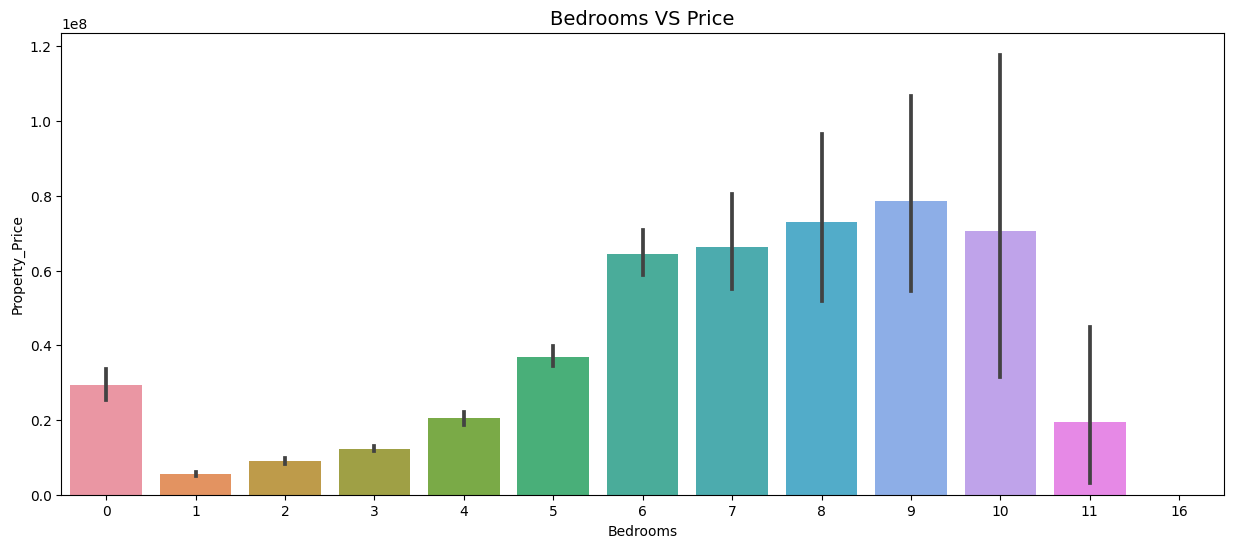

In [16]:
#Plotting relation between bedrooms and price
plt.figure(figsize=(15,6))

ax = sns.barplot(x=df['Bedrooms'], y=df['Property_Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Bedrooms VS Area')

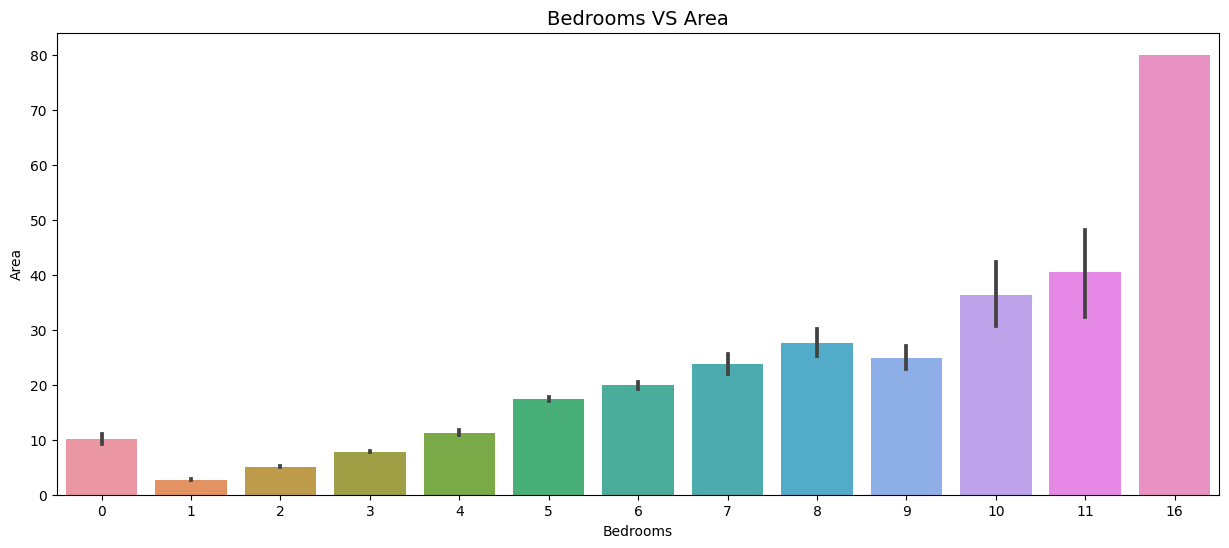

In [17]:
#Plotting relation between bedrooms and area
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['Bedrooms'], y=df['Area'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Area', fontsize=14)

In [18]:
# Since about 7.85% of properties are without entered data for bedrooms and baths
# resulting in 0 values in data. By analyzing Bedrooms against Area and Price
# and its correlation with both features
# We can replace 0 bedrooms with 5 bedrooms 

df['Bedrooms'].replace(to_replace = 0, value = 5, inplace = True)

In [19]:
df.Bedrooms[df.Bedrooms==16].count()

1

In [20]:
#Removing row with 16 bedrooms, its an outlier
df = df[df.Bedrooms != 16]

Text(0.5, 1.0, 'Bedrooms VS Price')

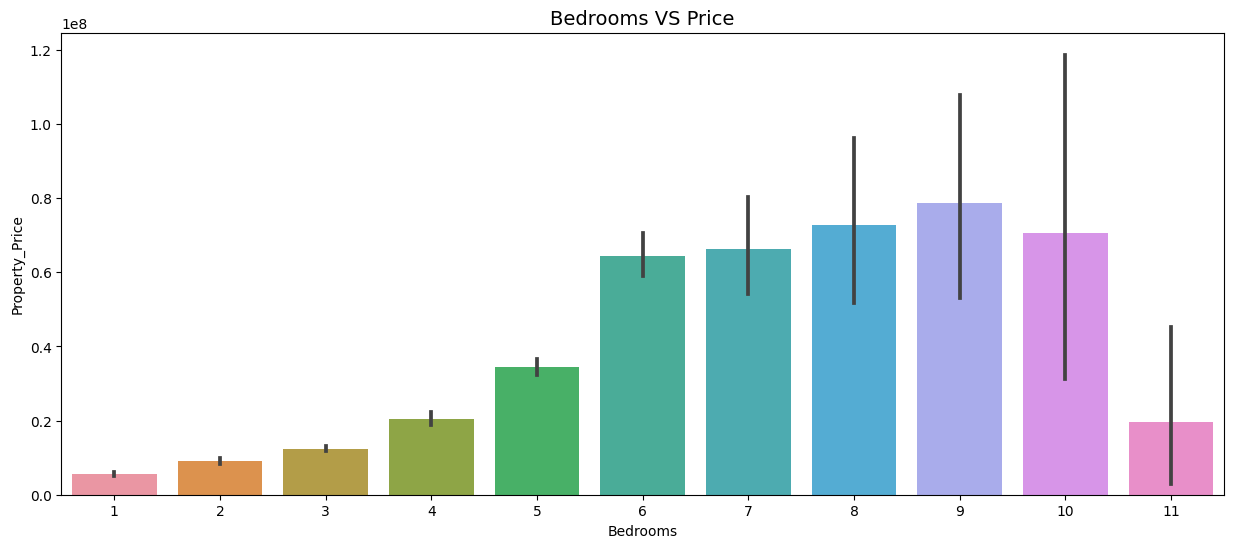

In [21]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['Bedrooms'], y=df['Property_Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

Text(0.5, 1.0, 'Baths VS Price')

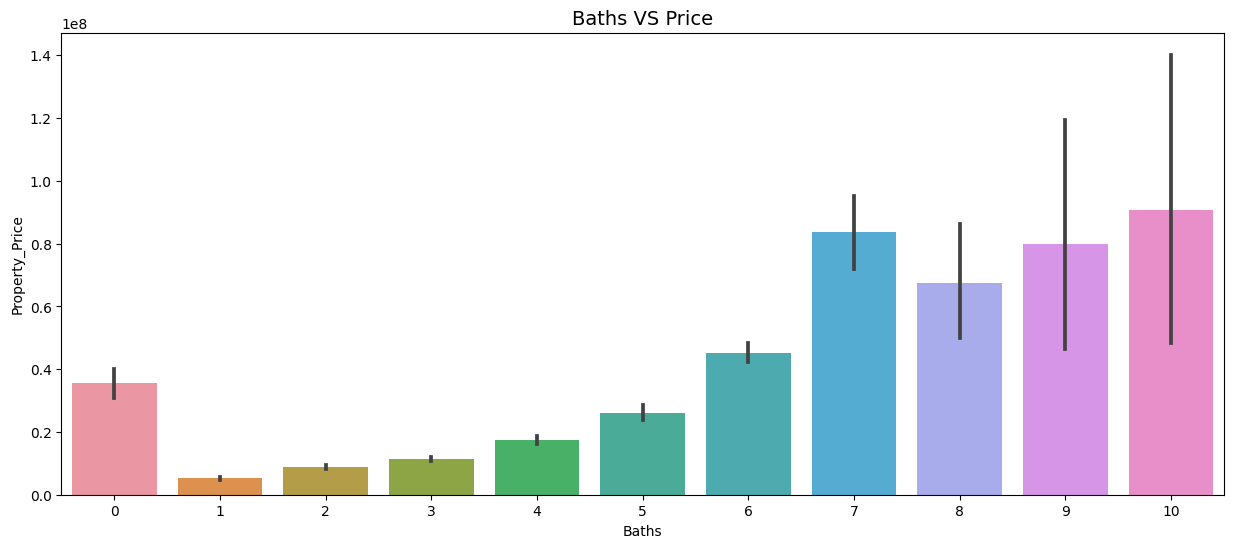

In [22]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['Baths'], y=df['Property_Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Baths VS Price', fontsize=14)

Text(0.5, 1.0, 'Baths VS Area')

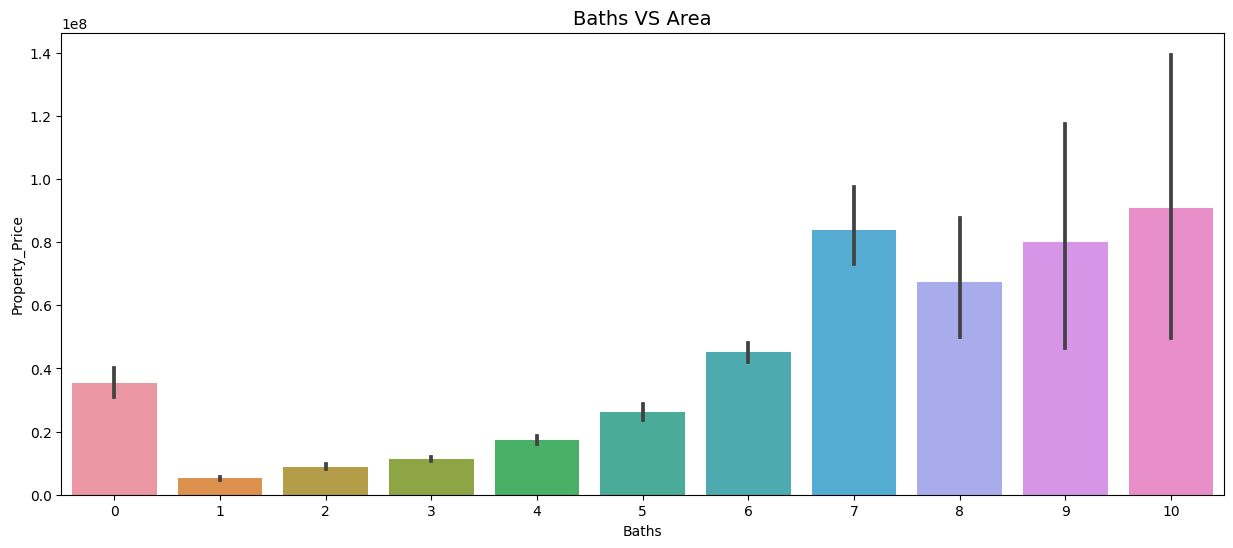

In [23]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['Baths'], y=df['Property_Price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Baths VS Area', fontsize=14)

In [24]:
# Replacing 0 baths by 5 as Bedrooms and Baths are correlated
df['Baths'].replace(to_replace = 0, value = 5, inplace = True)

Text(0.5, 1.0, 'Bedrooms VS Price')

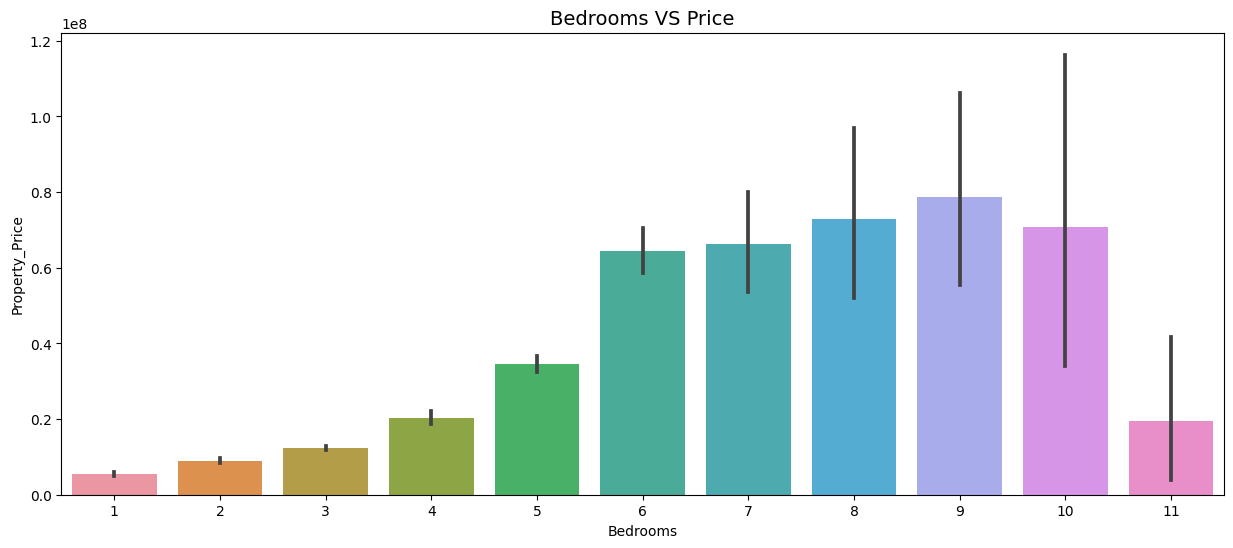

In [25]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['Bedrooms'], y=df['Property_Price'])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Bedrooms VS Price', fontsize=14)

In [26]:
# Displaying total records, min and max price from each city
# Dropping the row with odd property price observed
df = df[df.Property_Price != 1]
df = df[df.Property_Price != 12]
df = df[df.Property_Price != 15]
df = df[df.Property_Price != 125]
city = df.groupby(['City']).Property_Price.agg([len, min, max])
city

,len,min,max
City,,,
Islamabad,4778,11000,900000000
Karachi,3226,12000,850000000
Lahore,4715,11000,650000000


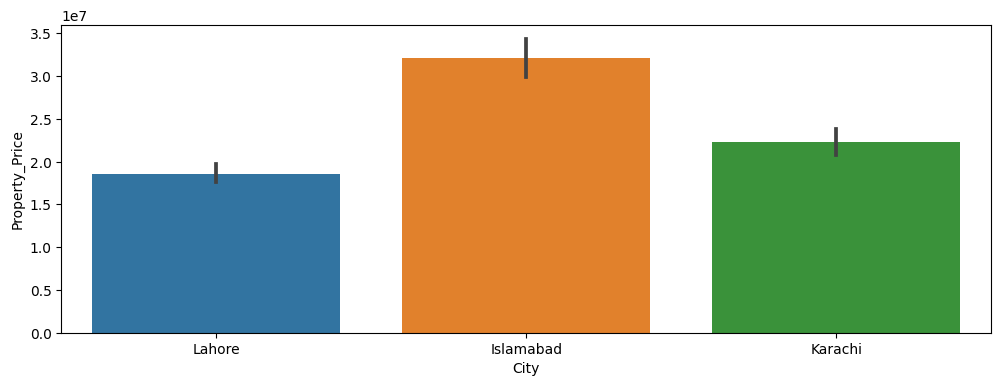

In [27]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x="City", y="Property_Price", data=df)
ax.set_xticklabels(ax.get_xticklabels());

In [28]:
city = df.groupby(['City']).Area.agg([len, min, max, np.mean])
city

,len,min,max,mean
City,,,,
Islamabad,4778,0.200000,300.0,12.569527
Karachi,3226,1.090909,158.0,9.661230
Lahore,4715,1.000000,100.0,10.363966


/tmp/ipykernel_30997/654995354.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot = True)


Text(0.5, 1.0, 'CORRELATION MATRIX')

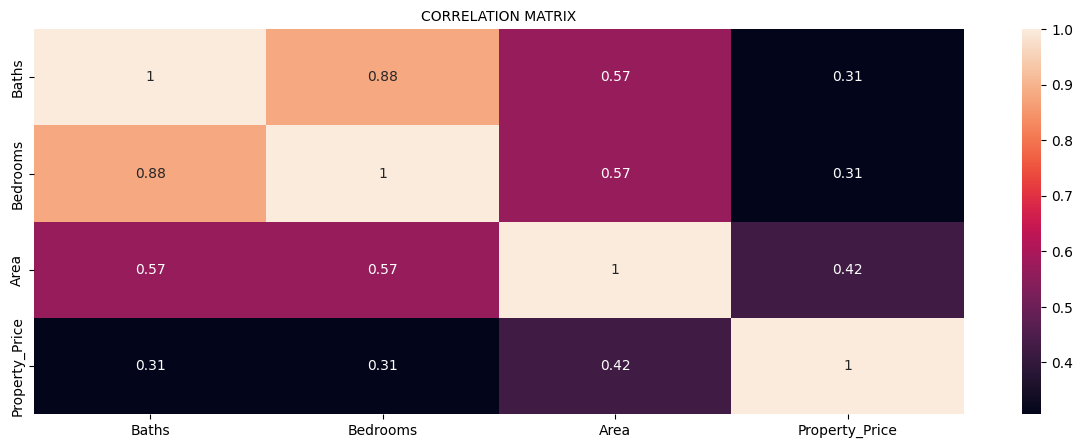

In [29]:
# Checking correlation after cleaning
# Checking correlation between the features
plt.figure(figsize=(15,5))
ax = sns.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=10)

In [30]:
df['Property_Type'].value_counts()

House    6638
Flat     6081
Name: Property_Type, dtype: int64

In [31]:
df['Property_Purpose'].value_counts()

For Rent    6600
For Sale    6119
Name: Property_Purpose, dtype: int64

In [32]:
df['City'].value_counts()

Islamabad    4778
Lahore       4715
Karachi      3226
Name: City, dtype: int64

In [33]:
df.head()

,Property_Type,Property_Purpose,Baths,Bedrooms,City,Area,Area_Name,Property_Price
0,Flat,For Sale,1,1,Lahore,2.1,Bahria Town,3900000
1,Flat,For Sale,1,5,Lahore,2.2,Raiwind Road,6000000
2,Flat,For Sale,3,3,Lahore,10.0,Askari,30000000
3,Flat,For Sale,3,3,Lahore,10.0,Askari,30000000
4,Flat,For Sale,3,3,Lahore,10.0,Askari,30000000


<AxesSubplot: >

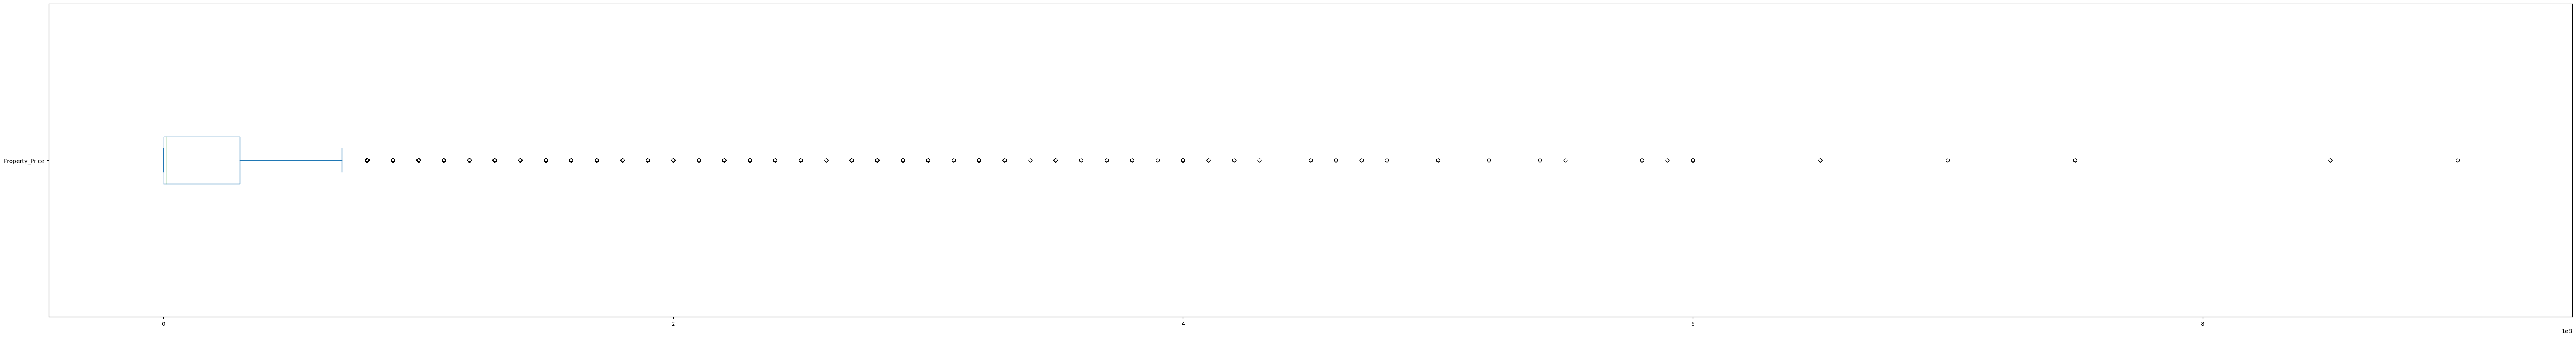

In [34]:
#Checking outliers in Price
df["Property_Price"].plot.box(vert = 0, figsize=(80,10))

In [35]:
df.Property_Price[df.Property_Price > 400000000].count()

49

<AxesSubplot: >

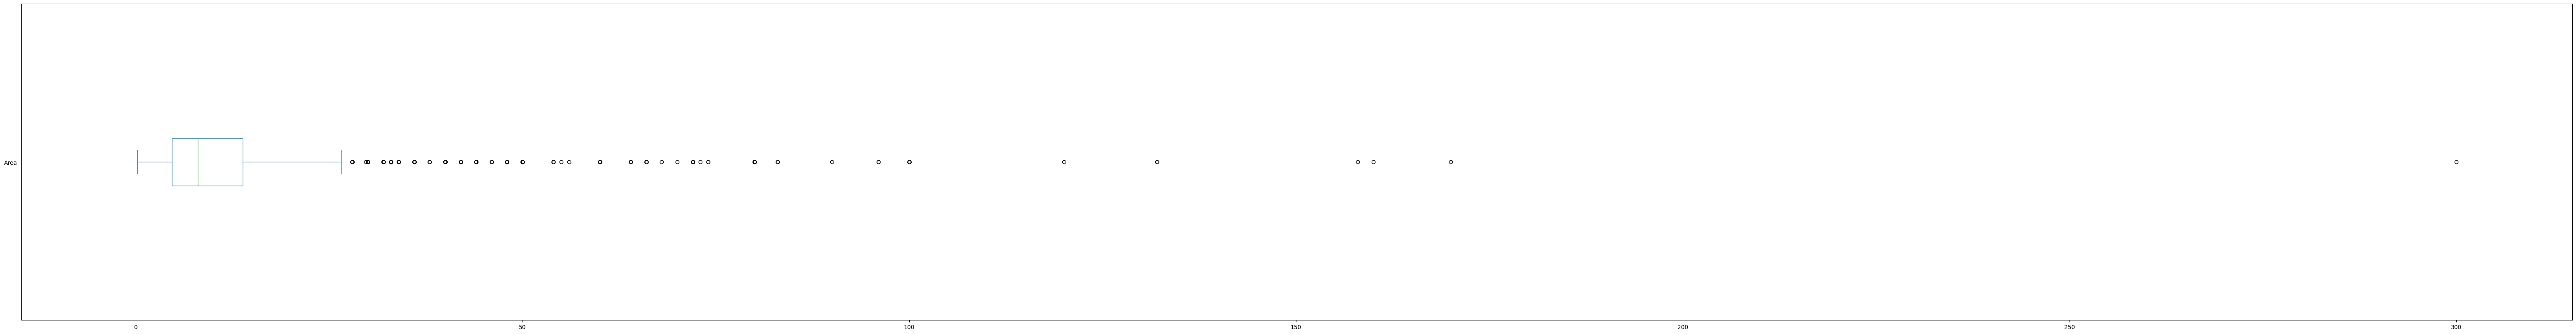

In [36]:
df["Area"].plot.box(vert = 0, figsize=(80,10))

In [37]:
city = df.groupby(['City']).Area.agg([len, min, max])
city

,len,min,max
City,,,
Islamabad,4778,0.200000,300.0
Karachi,3226,1.090909,158.0
Lahore,4715,1.000000,100.0


In [38]:
df.Area[df.Area > 100].count()

7

In [39]:
#Removing rows with area greater than 100 and price greater than 80 Crores
df = df[df.Area < 100]
df = df[df.Property_Price < 800000000]

<AxesSubplot: >

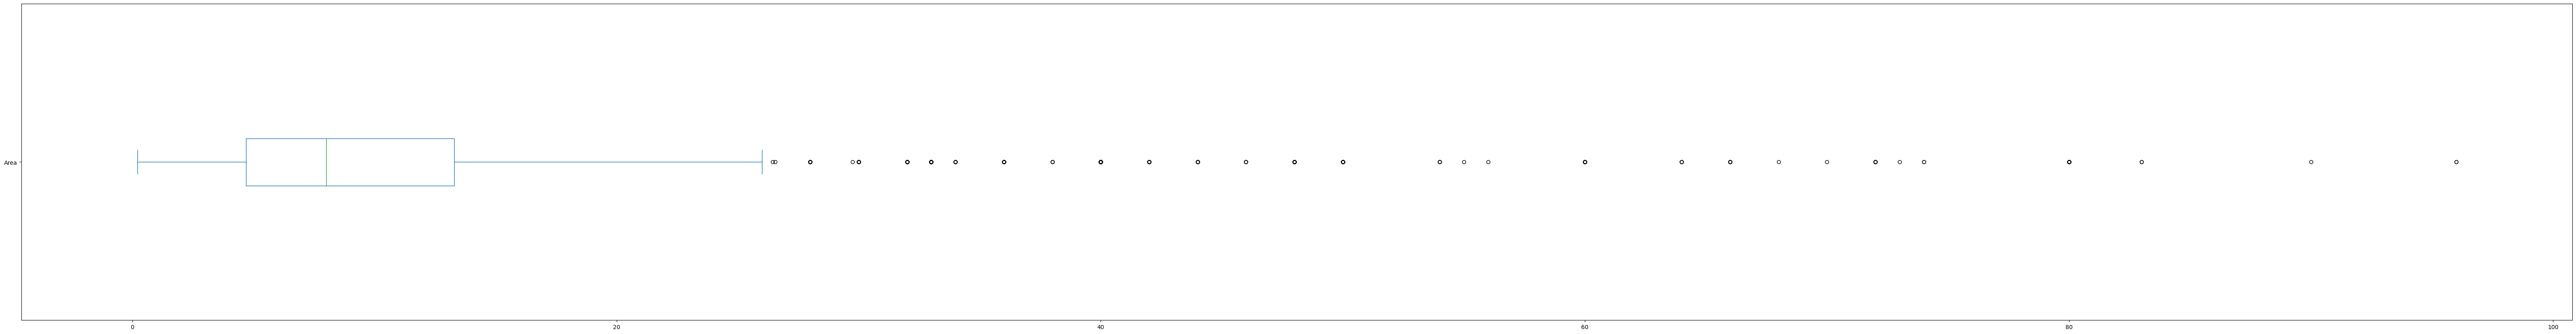

In [40]:
df["Area"].plot.box(vert = 0, figsize=(80,10))

<AxesSubplot: >

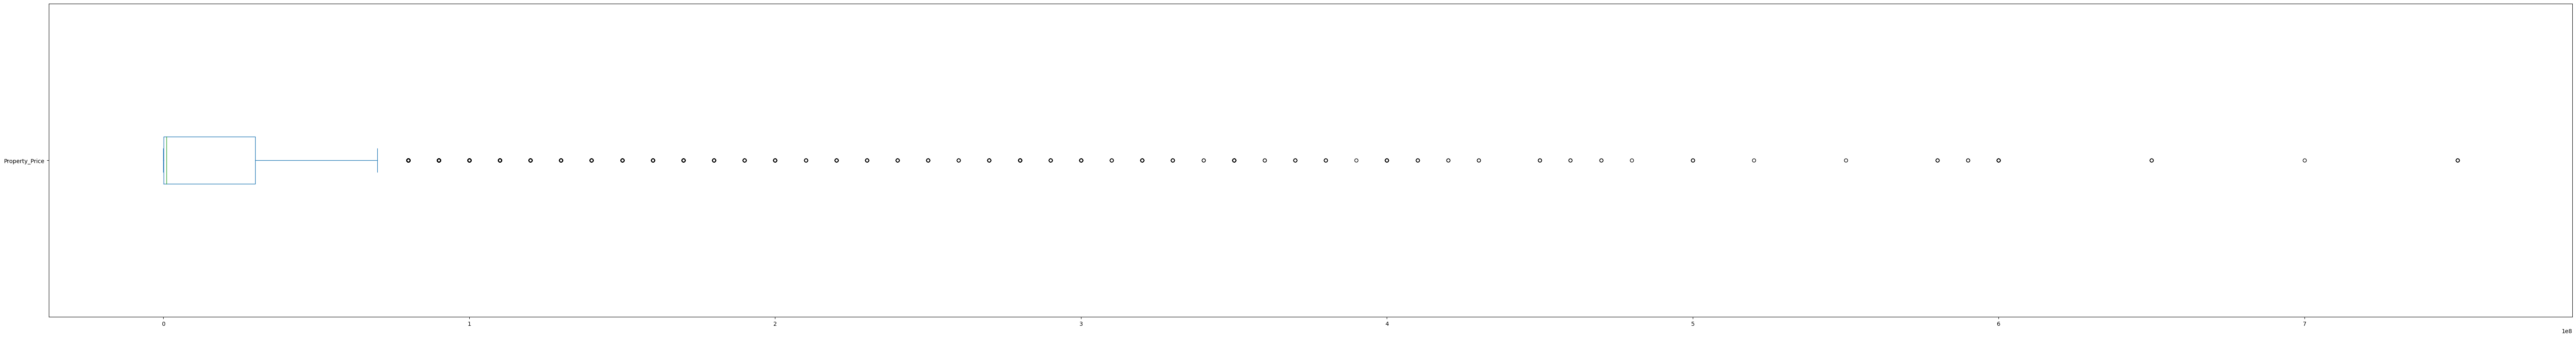

In [41]:
df["Property_Price"].plot.box(vert = 0, figsize=(80,10))

In [42]:
df.to_csv('final_data_processed.csv', index=False)

In [43]:
# Running the model on 'For Sale' properties only as the prices for rental property are lesser than sale property
# and can impact the accuracy of the model
df_for_sale = pd.read_csv('final_data_processed.csv')
df_for_sale = df_for_sale[df_for_sale["Property_Purpose"]=="For Sale"]
df_for_sale.drop(df_for_sale.columns[[1]], axis=1, inplace=True)
df_for_sale = pd.get_dummies(df_for_sale, columns = ['Property_Type','City', 'Area_Name'])
labels = df_for_sale["Property_Price"]
train = df_for_sale.drop(columns=["Property_Price"])
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.3, random_state = 12)
print(len(x_train),len(x_test))

4277 1833


In [44]:
df_for_sale.head()

,Baths,Bedrooms,Area,Property_Price,Property_Type_Flat,Property_Type_House,City_Islamabad,City_Karachi,City_Lahore,Area_Name_9th Avenue,...,Area_Name_Top City 1,Area_Name_University Road,Area_Name_University Town,Area_Name_Valencia Housing Society,Area_Name_Venus Housing Scheme,Area_Name_Vital Homes Housing Scheme,Area_Name_Walton Road,Area_Name_Wapda Town,Area_Name_Zamzama,Area_Name_Zaraj Housing Scheme
0,1,1,2.1,3900000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,2.2,6000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,10.0,30000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,10.0,30000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,10.0,30000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8792320598634673

In [46]:
#save linear regression model
import pickle
filename = 'finalized_model_LR.sav'
pickle.dump(lr, open(filename, 'wb'))

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators = 250, max_depth = 6, learning_rate = 0.01)
est.fit(x_train, y_train)
est.score(x_test, y_test)

0.8830131308302522

In [48]:
#save est model
filename = 'finalized_model_GBR.sav'
pickle.dump(est, open(filename, 'wb'))

In [49]:
# Fitting SVM to the Training set
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

-0.08075235049955443

In [50]:
#save est model
filename = 'finalized_model_SVR.sav'
pickle.dump(est, open(filename, 'wb'))

In [51]:
#neural network
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), max_iter=1000, alpha=0.1,
                        solver='adam',verbose=True,  random_state=21,tol=0.000000001,shuffle=True)
mlp.fit(x_train,y_train)
mlp.score(x_test, y_test)

Iteration 1, loss = 3556646853823777.50000000
Iteration 2, loss = 3556629935857092.00000000
Iteration 3, loss = 3556522641554284.50000000
Iteration 4, loss = 3556043958756826.00000000
Iteration 5, loss = 3554653044706349.00000000
Iteration 6, loss = 3551184003570399.50000000
Iteration 7, loss = 3544155345040634.50000000
Iteration 8, loss = 3531209650880427.50000000
Iteration 9, loss = 3509623527314577.50000000
Iteration 10, loss = 3475978268338357.00000000
Iteration 11, loss = 3427958115598867.50000000
Iteration 12, loss = 3360371995196022.00000000
Iteration 13, loss = 3270197366606617.00000000
Iteration 14, loss = 3154342997800688.00000000
Iteration 15, loss = 3008804463903354.00000000
Iteration 16, loss = 2838574890391985.50000000
Iteration 17, loss = 2644188405614540.50000000
Iteration 18, loss = 2427133353944326.00000000
Iteration 19, loss = 2199318888397200.75000000
Iteration 20, loss = 1975154507386864.00000000
Iteration 21, loss = 1756578900726235.50000000
Iteration 22, loss = 1

/home/tafheem/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.921362265929324

In [52]:
#save mlp model
filename = 'finalized_model_mlp.sav'
pickle.dump(mlp, open(filename, 'wb'))